# Fake news detection on Hindi news articles using Bidirectional LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 
plt.style.use('ggplot')

In [2]:
fake_news=pd.read_csv('Data/fake_news_basic.csv')
true_news=pd.read_csv('Data/true_news_basic.csv')

In [3]:
# make both length equal
if len(fake_news) > len(true_news):
  fake_news = fake_news.head(len(true_news))
elif len(true_news) > len(fake_news):
  true_news = true_news.head(len(fake_news))
print("Length of fake news: ", len(fake_news))
print("Length of true news: ", len(true_news))

Length of fake news:  760
Length of true news:  760


In [4]:
true_news['label']=1
fake_news['label']=0
news = pd.concat([fake_news, true_news])
news.tail()
news.head()

,Column1,short_description,label
0,0,बूम पाय इमरान खान भारत सरकार आलोच रह वर्तमान श...,0
1,1,सिख समुदाय के लोग हिंद साइन बोर्ड कालिख पोत दि...,0
2,2,सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक ट्विटर दाव के बड़ ...,0
3,3,दाव भाजप के मा सरकार जन के गलत रह ।,0
4,4,मीडिय आउटलेट्स वायर एजेंस गलत तरीक दाव किय पाक...,0


In [5]:
x= news.drop('label',axis=1)

In [6]:
y = news['label']

# Natural Language Processing

In [7]:
temp = x.copy()
temp

,Column1,short_description
0,0,बूम पाय इमरान खान भारत सरकार आलोच रह वर्तमान श...
1,1,सिख समुदाय के लोग हिंद साइन बोर्ड कालिख पोत दि...
2,2,सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक ट्विटर दाव के बड़ ...
3,3,दाव भाजप के मा सरकार जन के गलत रह ।
4,4,मीडिय आउटलेट्स वायर एजेंस गलत तरीक दाव किय पाक...
...,...,...
755,887,चालक कार रोक के बजाय चल जार रख ट्रैफ़िक पुलिसक...
756,888,मिसाइल 400 किलोमीटर ज़्याद मार सक
757,889,आकर्षण केंद्र वो शक्तिशाल पहलवान जिनक संबंध प्...
758,890,बिहार के जातिगत समीकरण बात लंब बीजेप हिंद पहचा...


In [8]:
temp.reset_index(inplace=True)
temp

,index,Column1,short_description
0,0,0,बूम पाय इमरान खान भारत सरकार आलोच रह वर्तमान श...
1,1,1,सिख समुदाय के लोग हिंद साइन बोर्ड कालिख पोत दि...
2,2,2,सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक ट्विटर दाव के बड़ ...
3,3,3,दाव भाजप के मा सरकार जन के गलत रह ।
4,4,4,मीडिय आउटलेट्स वायर एजेंस गलत तरीक दाव किय पाक...
...,...,...,...
1515,755,887,चालक कार रोक के बजाय चल जार रख ट्रैफ़िक पुलिसक...
1516,756,888,मिसाइल 400 किलोमीटर ज़्याद मार सक
1517,757,889,आकर्षण केंद्र वो शक्तिशाल पहलवान जिनक संबंध प्...
1518,758,890,बिहार के जातिगत समीकरण बात लंब बीजेप हिंद पहचा...


In [9]:
import nltk
import re
from nltk.corpus import stopwords

In [10]:
# stopwords
stopwords_hindi =[
 'अत','अपना','अपनी','अपने','अभी','अंदर','आदि','आप','इत्यादि','इन','इनका','इन्हीं','इन्हें','इन्हों','इस','इसका','इसकी','इसके','इसमें',
'इसी','इसे','उन','उनका','उनकी','उनके','उनको','उन्हीं','उन्हें','उन्हों','उस','उसके','उसी','उसे','एक','एवं','एस','ऐसे','और','कई',
'कर','करता','करते','करना','करने','करें','कहते','कहा','का','काफ़ी','कि','कितना','किन्हें','किन्हों','किया','किर','किस','किसी','किसे','की',
'कुछ','कुल','के','को','कोई','कौन','कौन','बही','बहुत','बाद','बाला','बिलकुल','भी','भीतर','मगर','मानो','मे','में','यदि','यह','यहाँ','यही',
'या','यिह','ये','रखें','रहा','रहे','ऱ्वासा','लिए','लिये','लेकिन','व','वग़ैरह','वर्ग','वह','वहाँ','वहीं','वाले','वुह','वे','सकता','सकते','सबसे',
'सभी','साथ','साबुत','साभ','सारा','से','सो','संग','ही','हुआ','हुई','हुए','है','हैं','हो','होता','होती','होते','होना','होने']

In [11]:
stopwords= stopwords_hindi

# Check out the distribution of fake news compare to real news

In [12]:
fake_df=(news['label'] == 0) 
real_df=(news['label'] == 1)

Text(0, 0.5, 'Proportion of News Articles')

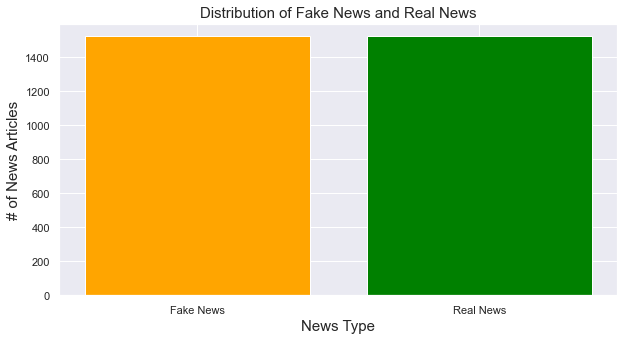

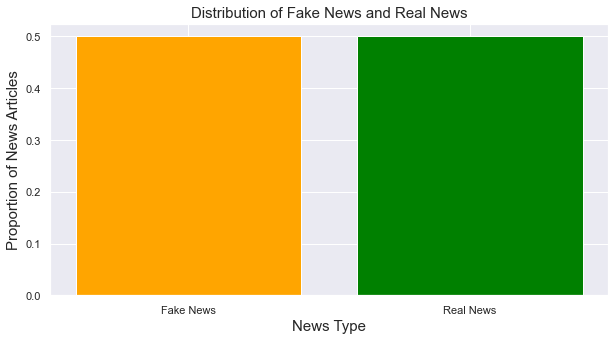

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df), color='orange')
plt.bar('Real News', len(real_df), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)
plt.savefig('news.jpg',bbox_inches = 'tight',transparent=True)

total_len = len(fake_df) + len(real_df)
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df) / total_len, color='orange')
plt.bar('Real News', len(real_df) / total_len, color='green')
plt.title('Distribution of Fake News and Real News', size=15)

plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)



In [14]:
input_array=np.array(temp['short_description'])
len(input_array)
temp['short_description']
input_array

array(['बूम पाय इमरान खान भारत सरकार आलोच रह वर्तमान शासन अधिनायकवाद मुस्लिम विरोध पाकिस्तान ',
       'सिख समुदाय के लोग हिंद साइन बोर्ड कालिख पोत दिख तस्वीर सेट वीडिय वायरल रह ',
       'सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक ट्विटर दाव के बड़ संख्य तस्वीर के पोस्ट शेयर किय रह है। ',
       ...,
       'आकर्षण केंद्र वो शक्तिशाल पहलवान जिनक संबंध प्रसिद्ध भोल पहलवान परिवार दारुल सेहत सब भोल अखाड़ के नाम जान ',
       'बिहार के जातिगत समीकरण बात लंब बीजेप हिंद पहचान के आधार वोटर लामबंद लग इसक सोशल इंजीनियरिंग उसक ध्यान रह ',
       'एनआईए 83 साल के फ़ादर स्टेन स्वाम गिरफ़्तार यूएपीए धाराएँ लग '],
      dtype=object)

# Text Processing

In [15]:
import re
import nltk
# ltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,len(input_array)):
    review = input_array[i]
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords_hindi)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)
print(corpus[1])


['बूम पाय इमरान खान भारत सरकार आलोच रह वर्तमान शासन अधिनायकवाद मुस्लिम विरोध पाकिस्तान', 'सिख समुदाय लोग हिंद साइन बोर्ड कालिख पोत दिख तस्वीर सेट वीडिय वायरल रह', 'सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक ट्विटर दाव बड़ संख्य तस्वीर पोस्ट शेयर किय रह है।', 'दाव भाजप मा सरकार जन गलत रह ।', 'मीडिय आउटलेट्स वायर एजेंस गलत तरीक दाव किय पाकिस्तान पूर्व राजनयिक बालाकोट मौत', 'यूज़र्स तस्वीर शेयर दाव रह तस्वीर पुरा दिल्ल रेलव स्टेशन प्लेटफ़ॉर्म बन मस्जिद', 'बूम पाय मूल तस्वीर साल 2014 अमित शाह प्रधानमंत्र नरेंद्र मोद बध दे रह थे।', 'बूम पाय वायरल तस्वीर साल 2018 उत्तर प्रदेश उन्नाव हत्य है।', 'दाव कोविड-19 टीक लिंग लग वायरस जल्द राहत मिल', 'दाव वायरल ब्रिटेन प्रधानमंत्र किसान आंदोलन कारण भारत दौर रद्द किय', 'दाव किय गय तस्वीर बड़ संख्य दिल्ल सीम एकत्र किसान टेंट्स दिख', 'दाव किय रह वीडिय किसान आंदोलन 26 जनवर वाल परेड तैयार दिख', 'हिंद अख़बार पत्रिक न्यूज़ चैनल्स ज़ी न्यूज़ एबीप समेत न्यूज़ संस्थान पेड कंटेंट योग आदित्यनाथ', 'इंदौर शो हिन्द देव देव अमित शाह कथित अभद्र टिप्पण आरोप मुनव्वर फ़ारूक गिरफ़्तार', 'दाव पाकि

In [16]:
voc_size=5000

from tensorflow.keras.preprocessing.text import one_hot

one_hot_repr =[one_hot(words,voc_size) for words in corpus]
one_hot_repr

[[1032,
  4083,
  1589,
  2635,
  3037,
  1370,
  3845,
  2930,
  1046,
  962,
  1129,
  4699,
  1041,
  2053],
 [4283,
  2701,
  2605,
  1309,
  4073,
  1090,
  3543,
  4273,
  4950,
  2449,
  1525,
  540,
  1878,
  2930],
 [1689,
  1381,
  679,
  2764,
  4152,
  2098,
  1577,
  58,
  2449,
  2598,
  3726,
  3739,
  2930,
  1762],
 [2098, 3013, 3029, 1370, 3558, 2762, 2930, 4869],
 [1381, 907, 1507, 3404, 2762, 903, 2098, 3739, 2053, 2359, 2328, 4064, 2939],
 [1724, 2449, 3726, 2098, 2930, 2449, 4916, 429, 1018, 4876, 679, 4583, 3425],
 [1032,
  4083,
  2997,
  2449,
  921,
  501,
  2524,
  4410,
  2455,
  4254,
  4486,
  4305,
  1475,
  2930,
  1909],
 [1032, 4083, 1878, 2449, 921, 1981, 4323, 2024, 880, 3728, 1762],
 [2098, 3319, 2605, 811, 1493, 1481, 4445, 698, 3315, 4686],
 [2098, 1878, 1262, 2455, 1474, 887, 4728, 3037, 782, 3916, 3739],
 [2098, 3739, 2698, 2449, 1577, 58, 429, 552, 43, 1474, 2906, 4950],
 [2098, 3739, 2930, 540, 1474, 887, 2832, 2622, 3723, 1098, 4073, 4950],
 

# Padding

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded = pad_sequences(one_hot_repr,padding='post',maxlen =20)
padded

array([[1032, 4083, 1589, ...,    0,    0,    0],
       [4283, 2701, 2605, ...,    0,    0,    0],
       [1689, 1381,  679, ...,    0,    0,    0],
       ...,
       [ 626, 1299, 2959, ..., 3049,    0,    0],
       [1333, 3774, 4685, ..., 2930,    0,    0],
       [3278, 3566,  921, ...,    0,    0,    0]])

# Bidirectional LSTM Model:
It is an Extension of LSTM's which improves model performance on sequential data. It consists two LSTM's instead of one LSTM.


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, Dropout, GlobalAveragePooling1D, Flatten, Dense

In [19]:
embed_dim = 40
model = Sequential([
    Embedding(voc_size,embed_dim,input_length=20),
    Bidirectional(LSTM(100)),
    #Flatten(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2), 
    Dense(32, activation='relu'),
    Dense(1,activation='sigmoid')
    ])

In [20]:
model.compile(loss='binary_crossentropy',optimizer ='adam',metrics =['accuracy'])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

In [22]:
x = np.array(padded)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(x,y,test_size=0.3,random_state=0)
#len(trainY)
#len(testY)

In [24]:
len(trainX)

1064

In [25]:
history = model.fit(trainX,trainY, epochs =10, validation_data=(testX,testY),batch_size=64)

Epoch 1/10
17/17 [==============================] - 9s 140ms/step - loss: 0.6667 - accuracy: 0.6823 - val_loss: 0.5954 - val_accuracy: 0.8004
Epoch 2/10
17/17 [==============================] - 1s 42ms/step - loss: 0.3362 - accuracy: 0.9041 - val_loss: 0.2373 - val_accuracy: 0.9408
Epoch 3/10
17/17 [==============================] - 1s 42ms/step - loss: 0.0504 - accuracy: 0.9840 - val_loss: 0.2927 - val_accuracy: 0.9430
Epoch 4/10
17/17 [==============================] - 1s 40ms/step - loss: 0.0218 - accuracy: 0.9944 - val_loss: 0.1699 - val_accuracy: 0.9452
Epoch 5/10
17/17 [==============================] - 1s 41ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.2193 - val_accuracy: 0.9452
Epoch 6/10
17/17 [==============================] - 1s 41ms/step - loss: 4.2836e-04 - accuracy: 1.0000 - val_loss: 0.2966 - val_accuracy: 0.9430
Epoch 7/10
17/17 [==============================] - 1s 41ms/step - loss: 1.4807e-04 - accuracy: 1.0000 - val_loss: 0.3178 - val_accuracy: 0.9408
Epoc

# Visualize our training over time

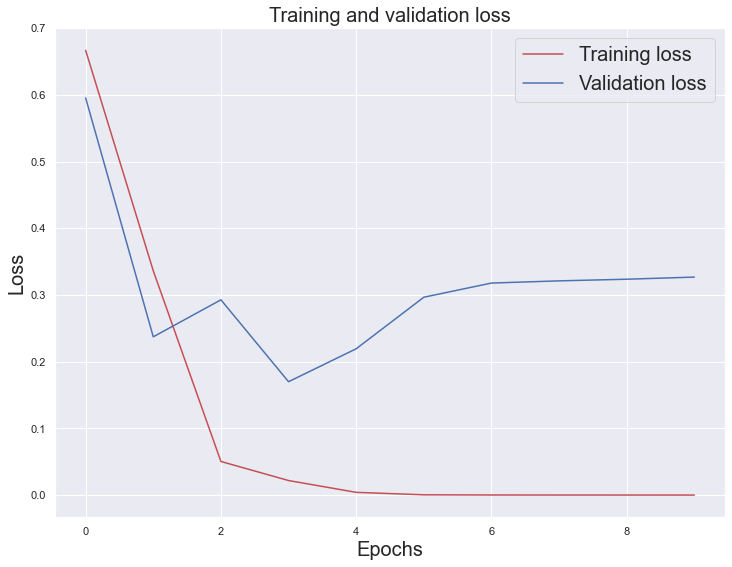

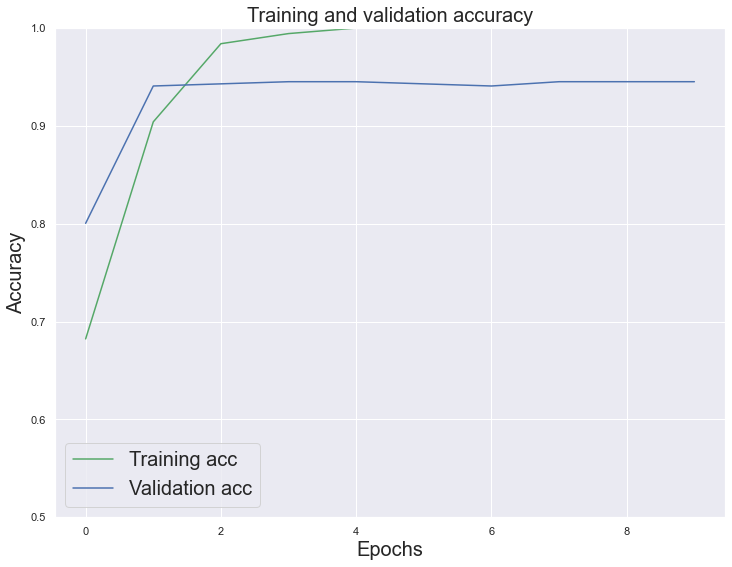

In [26]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.savefig('Training and Validation Loss BLSTM.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.savefig('Training and Validation Accuracy BLSTM.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

In [27]:
pred = np.argmax(model.predict(testX), axis=-1)
#pred

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testY,pred)

In [29]:
pred = model.predict(testX)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print('Accuracy on testing set:', accuracy_score(binary_predictions, testY))
print('Precision on testing set:', precision_score(binary_predictions, testY))
print('Recall on testing set:', recall_score(binary_predictions, testY))

Accuracy on testing set: 0.9451754385964912
Precision on testing set: 0.9818181818181818
Recall on testing set: 0.9113924050632911


In [31]:
testY[17]

1

In [32]:
#new=testX[3]
pred = model.predict(testX)
#print(pred)
binary_predictions = []
for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 
print(binary_predictions[17])
print(binary_predictions)
print(testY)

1
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0

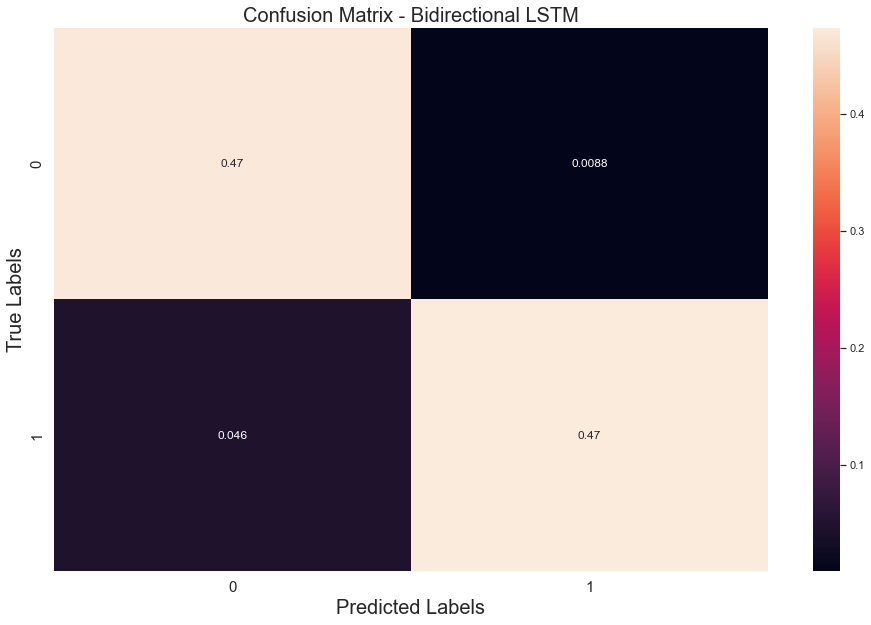

In [33]:

matrix = confusion_matrix(binary_predictions, testY, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix - Bidirectional LSTM', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)
plt.savefig('Confusion Matrix BLSTM.jpg',bbox_inches = 'tight',transparent=True)


In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, binary_predictions)
from sklearn.metrics import accuracy_score
score_gnb = accuracy_score(testY,binary_predictions)
print(cm)

[[215  21]
 [  4 216]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(binary_predictions, testY))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       219
           1       0.98      0.91      0.95       237

    accuracy                           0.95       456
   macro avg       0.95      0.95      0.95       456
weighted avg       0.95      0.95      0.95       456



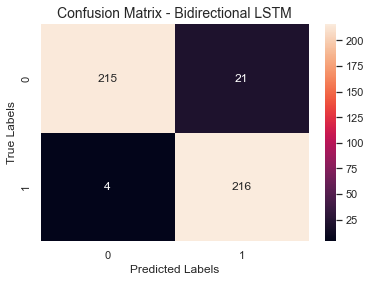

In [36]:
# Heatmap
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm,annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=12)
ax.set_ylabel('True Labels', size=12)
ax.set_title('Confusion Matrix - Bidirectional LSTM', size=14) 

plt.savefig('Confusion Matrix BLSTM.jpg',bbox_inches = 'tight',transparent=True)

In [37]:
#model is real model
# model1 is saved model using model.save()
#model2 is saved weights and json file model

In [38]:
#filename="Fin.h5"
#model.save(filename)

In [39]:
#Save the model
# serialize model to JSON
#----------------------------------------------------
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
 #   json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")

In [40]:
#def save(model):
    # Save the trained weights
 #   model.save_weights('weights.h5')

    # Save the model architecture
  #  with open('architecture.json', 'w') as f:
        #f.write(model.to_json())

In [41]:
#save(model)

In [42]:
import keras.models
from keras.models import model_from_json
def models():
    # Model reconstruction from JSON file
    with open('architecture.json', 'r') as f:
        model = model_from_json(f.read())
    # Load weights into the new model
    model.load_weights('weights.h5')
    return model
model2=models()

In [43]:
#prdicted through model2 and get different results
pred = model2.predict(testX)
#print(pred)
binary_predictions = []
for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 
print(binary_predictions)
print(testY)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [44]:
from tensorflow.keras.models import load_model
model1 = load_model("Fin.h5")

In [45]:
#predicted through model1 and get different result
prede=model1.predict(testX)
binary_predictions=[]
for i in prede:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
       binary_predictions.append(0)
print(binary_predictions)
print(testY)
#print(testX[0])

[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 

In [46]:
#Predicted through model and get correct results
news=pd.read_csv('testX.csv')
input_array=np.array(news['short_description'])
stopwords_hindi =[      
    'अत','अपना','अपनी','अपने','अभी','अंदर','आदि','आप','इत्यादि','इन','इनका','इन्हीं','इन्हें','इन्हों','इस','इसका','इसकी','इसके','इसमें',
    'इसी','इसे','उन','उनका','उनकी','उनके','उनको','उन्हीं','उन्हें','उन्हों','उस','उसके','उसी','उसे','एक','एवं','एस','ऐसे','और','कई',
    'कर','करता','करते','करना','करने','करें','कहते','कहा','का','काफ़ी','कि','कितना','किन्हें','किन्हों','किया','किर','किस','किसी','किसे','की',
    'कुछ','कुल','के','को','कोई','कौन','कौन','बही','बहुत','बाद','बाला','बिलकुल','भी','भीतर','मगर','मानो','मे','में','यदि','यह','यहाँ','यही',
    'या','यिह','ये','रखें','रहा','रहे','ऱ्वासा','लिए','लिये','लेकिन','व','वग़ैरह','वर्ग','वह','वहाँ','वहीं','वाले','वुह','वे','सकता','सकते','सबसे',
    'सभी','साथ','साबुत','साभ','सारा','से','सो','संग','ही','हुआ','हुई','हुए','है','हैं','हो','होता','होती','होते','होना','होने']
stopwords= stopwords_hindi
corpus = []
for i in range(0,len(input_array)):
    review = input_array[i]
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords_hindi)]
    review = ' '.join(review)
    corpus.append(review)
voc_size=5000
from tensorflow.keras.preprocessing.text import one_hot
one_hot_repr =[one_hot(words,voc_size) for words in corpus]
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded = pad_sequences(one_hot_repr,padding='post',maxlen =20)
x = np.array(padded)
pred=model.predict(x)
binary_predictions=[]
for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 
print(binary_predictions)
print(testY)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 